In [2]:
import numpy as np
import matplotlib.pyplot as plt

from torchok.data.transforms import (
    Compose,
    Normalize,
    ToTensorV2,
)

from russian_htr import HandwrittenDataset

In [3]:
MEAN = np.array([0.485, 0.456, 0.406])
STD = np.array([0.229, 0.224, 0.225])

In [7]:
def imshow(img, title=None, plt_ax=plt, default=False):
    img = img.numpy().transpose((1, 2, 0))
    img = STD * img + MEAN
    img = np.clip(img, 0, 1)
    plt_ax.imshow(img)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [8]:
transform = Compose([
    Normalize(mean=MEAN, std=STD),
    ToTensorV2()
])

ds = HandwrittenDataset("/home/d.nesterov/russian-htr/data/HKR", 'all', transform=transform)

{'width': 495, 'height': 64} torch.Size([3, 64, 495])
{'width': 494, 'height': 65} torch.Size([3, 65, 494])
{'width': 489, 'height': 73} torch.Size([3, 73, 489])
{'width': 406, 'height': 46} torch.Size([3, 46, 406])
{'width': 379, 'height': 76} torch.Size([3, 76, 379])
{'width': 578, 'height': 73} torch.Size([3, 73, 578])
{'width': 440, 'height': 73} torch.Size([3, 73, 440])
{'width': 529, 'height': 44} torch.Size([3, 44, 529])
{'width': 390, 'height': 64} torch.Size([3, 64, 390])


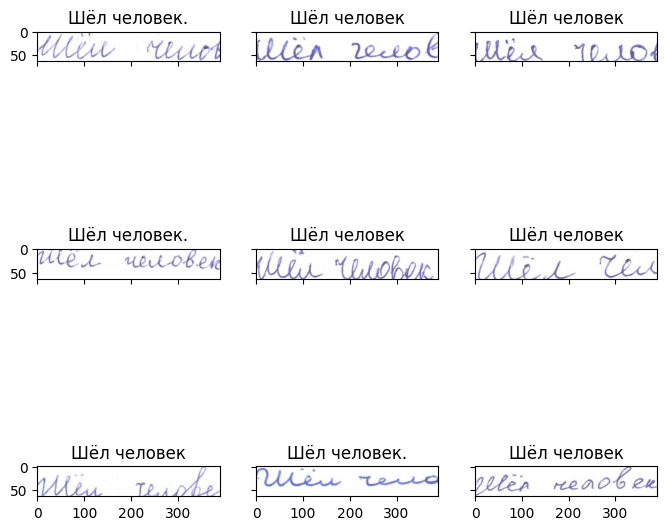

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8), sharey=True, sharex=True)
for i, fig_x in enumerate(ax.flatten()):
    random_characters = i

    sample = ds[random_characters]
    im_val = sample['image']

    label = sample['target']['description']
    print(sample['target']['size'], im_val.shape)

    imshow(im_val.data.cpu(), title=label, plt_ax=fig_x)

plt.show()